In [2]:
import pandas as pd

def load_data(file):
    # generic data processing function
    df = pd.read_csv(file,
                dtype={'_id':int, 'Redemption Count': int, 'Sales Count':int},
                parse_dates=['Timestamp'])
    df.sort_values('Timestamp', inplace=True)
    # convert to time-aware
    df.set_index('Timestamp', inplace=True)
    df_daily = df.resample('d').sum()
    # engineer some time features 
    df_daily['monthly'] = df_daily.reset_index().Timestamp.dt.month.values
    df_daily['quarter'] = df_daily.reset_index().Timestamp.dt.quarter.values
    return df_daily

df = load_data('./data/Toronto Island Ferry Ticket Counts.csv')
df.head()

,_id,Redemption Count,Sales Count,monthly,quarter
Timestamp,,,,,
2015-05-01,985694,1,4,5,2
2015-05-02,0,0,0,5,2
2015-05-03,0,0,0,5,2
2015-05-04,4681828,12,75,5,2
2015-05-05,11333457,537,549,5,2


In [34]:
sales_ts = df['Sales Count']
redemption_ts = df['Redemption Count']

# Removing seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

no_seasonality_sales = sales_ts - seasonal_decompose(sales_ts, model='additive', period=365).seasonal
no_seasonality_redemptions = redemption_ts - seasonal_decompose(redemption_ts, model='additive', period=365).seasonal

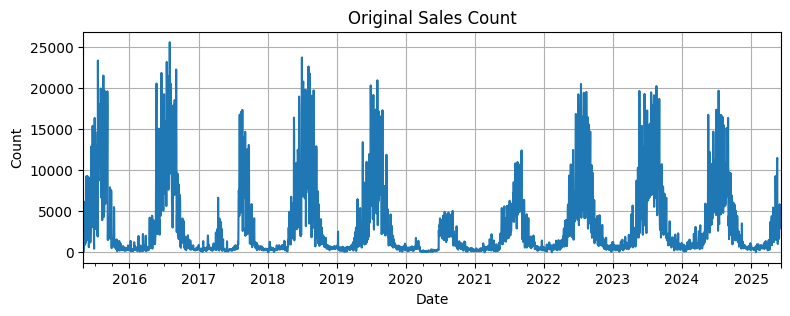

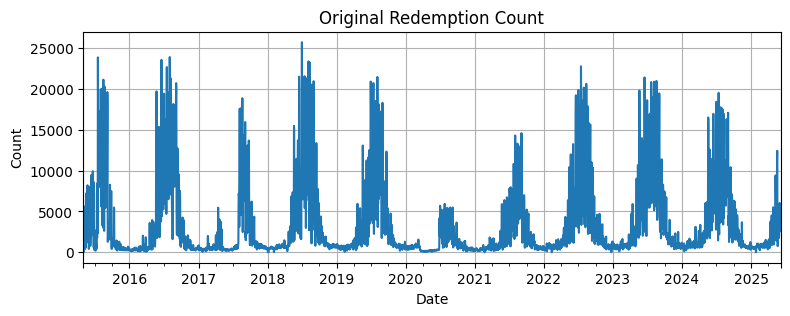

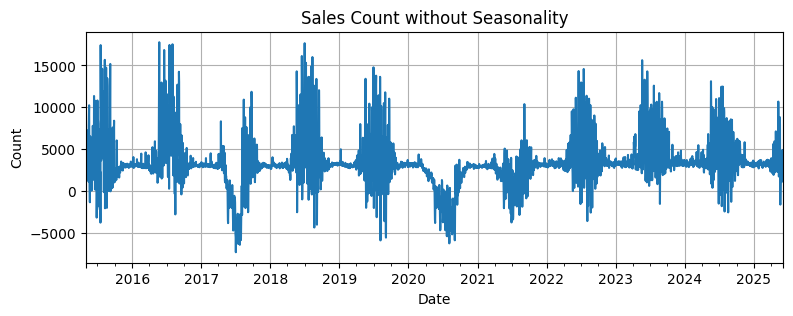

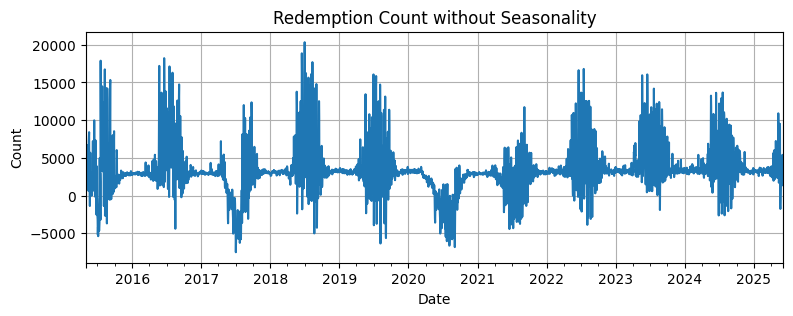

In [36]:
def plot_timeseries(ts, title):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(9, 3))
    ts.plot(title=title)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.grid()
    plt.show()

plot_timeseries(sales_ts, 'Original Sales Count')
plot_timeseries(redemption_ts, 'Original Redemption Count')
plot_timeseries(no_seasonality_sales, 'Sales Count without Seasonality')
plot_timeseries(no_seasonality_redemptions, 'Redemption Count without Seasonality')


In [37]:
# DF Augmented test
from statsmodels.tsa.stattools import adfuller

# Example: create a sample time series

# Perform Augmented Dickey-Fuller test
def adf_test(ts, name=None):
    """
    Perform Augmented Dickey-Fuller test on a time series.
    Returns the test statistic, p-value, and critical values.
    """
    print('-'*65)
    if name:
        print(f'\t=== Augmented Dickey-Fuller Test for {name} ===')
    result = adfuller(ts)

    # Print results
    print(f'ADF Statistic:   {result[0]:6.3f}')
    print(f'p-value:         {result[1]:6.3f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

    # Interpretation
    if result[1] < 0.05:
        print("Result:\n\tSeries is likely stationary (reject null hypothesis).")
    else:
        print("Result:\n\tSeries is likely non-stationary (fail to reject null).")

    print('-'*65)

adf_test(sales_ts, name='Sales Count')
adf_test(redemption_ts, name='Redemption Count')
adf_test(no_seasonality_sales, name='Sales Count without Seasonality')
adf_test(no_seasonality_redemptions, name='Redemption Count without Seasonality')

-----------------------------------------------------------------
	=== Augmented Dickey-Fuller Test for Sales Count ===
ADF Statistic:   -4.691
p-value:          0.000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Result:
	Series is likely stationary (reject null hypothesis).
-----------------------------------------------------------------
-----------------------------------------------------------------
	=== Augmented Dickey-Fuller Test for Redemption Count ===
ADF Statistic:   -4.516
p-value:          0.000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Result:
	Series is likely stationary (reject null hypothesis).
-----------------------------------------------------------------
-----------------------------------------------------------------
	=== Augmented Dickey-Fuller Test for Sales Count without Seasonality ===
ADF Statistic:   -3.995
p-value:          0.001
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Result:
	Series is likely stationary (reject null h

In [28]:
# Plot trend, seasonality, and residuals
import matplotlib.pyplot as plt
def plot_decomposition(ts, title='Seasonal Decomposition'):
    """
    Plot the seasonal decomposition of a time series.
    """
    decomposition = seasonal_decompose(ts, model='additive', period=365)
    fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
    
    axes[0].plot(ts, label='Original')
    axes[0].set_title('Original Time Series')
    axes[0].legend()

    axes[1].plot(decomposition.trend, label='Trend', color='orange')
    axes[1].set_title('Trend Component')
    axes[1].legend()

    axes[2].plot(decomposition.seasonal, label='Seasonality', color='green')
    axes[2].set_title('Seasonal Component')
    axes[2].legend()

    axes[3].plot(decomposition.resid, label='Residuals', color='red')
    axes[3].set_title('Residuals')
    axes[3].legend()

    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()


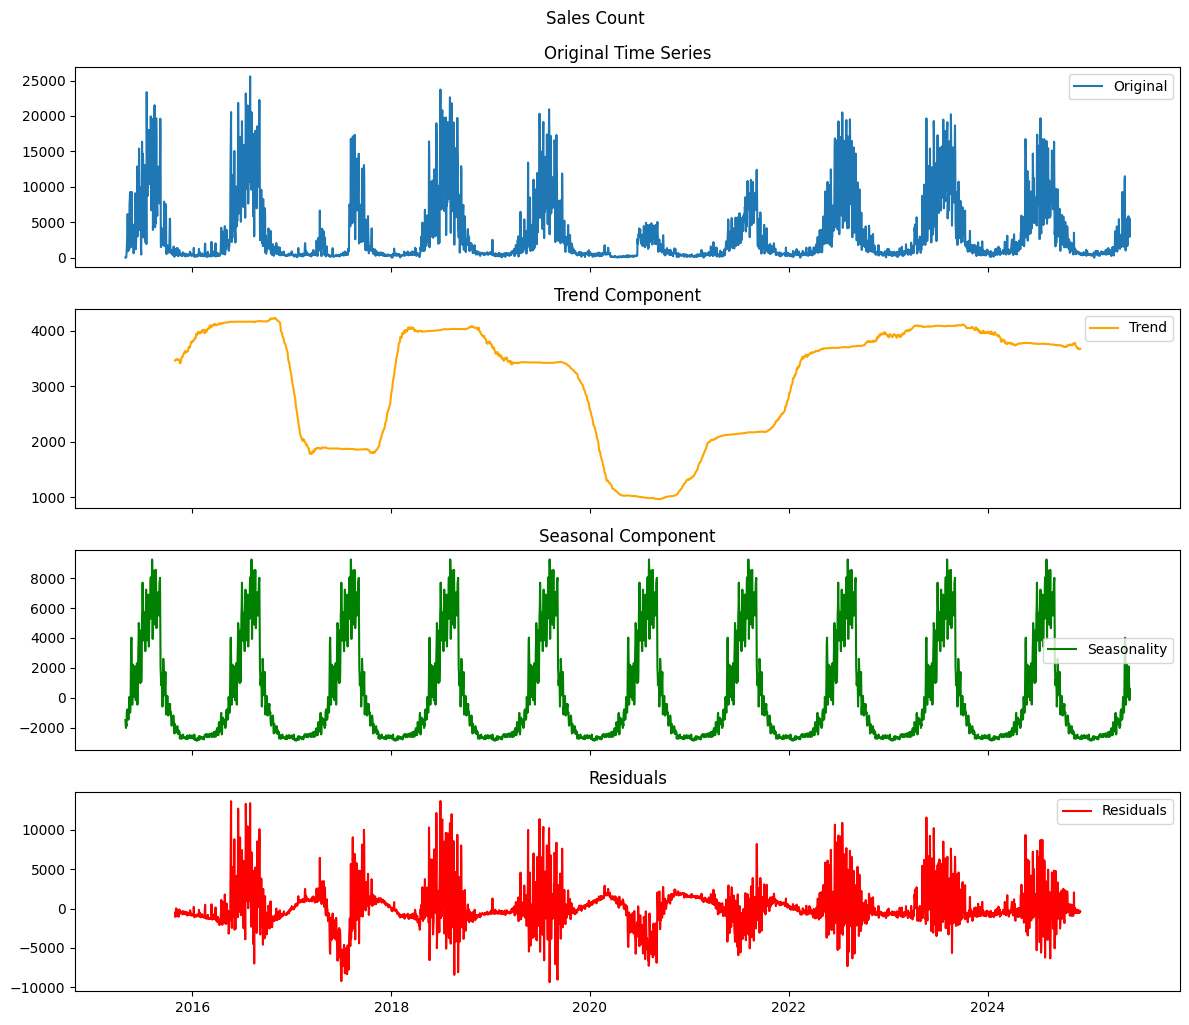

In [29]:
plot_decomposition(sales_ts, title='Sales Count')

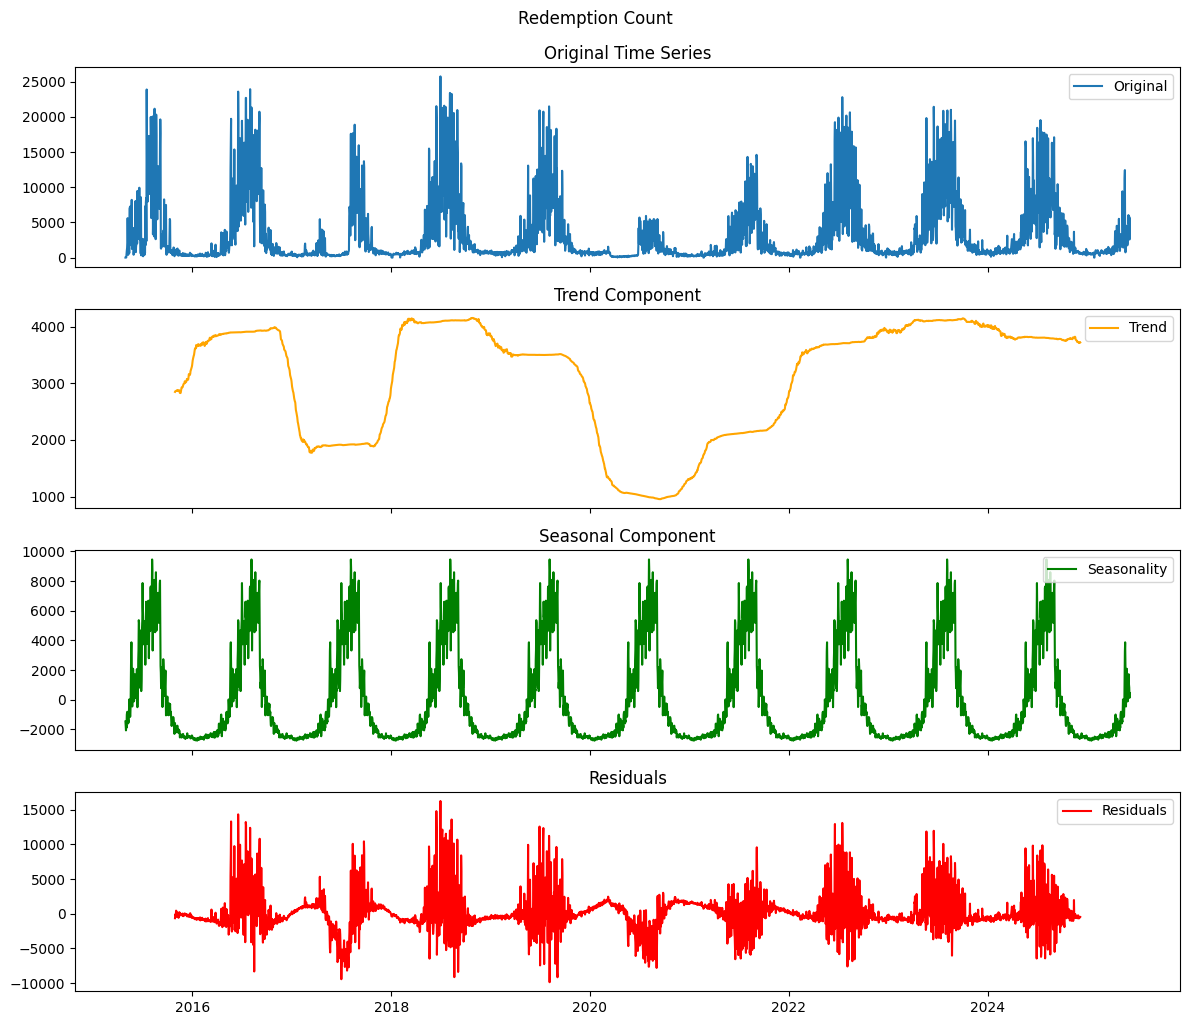

In [30]:
plot_decomposition(redemption_ts, title='Redemption Count')

In [ ]:

# Plot autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_pacf(ts, lags=30, title='ACF and PACF'):
    """
    Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    plot_acf(ts, lags=lags, ax=axes[0])
    axes[0].set_title('Autocorrelation Function (ACF)')
    
    plot_pacf(ts, lags=lags, ax=axes[1])
    axes[1].set_title('Partial Autocorrelation Function (PACF)')
    
    plt.suptitle(title)
    plt.show()



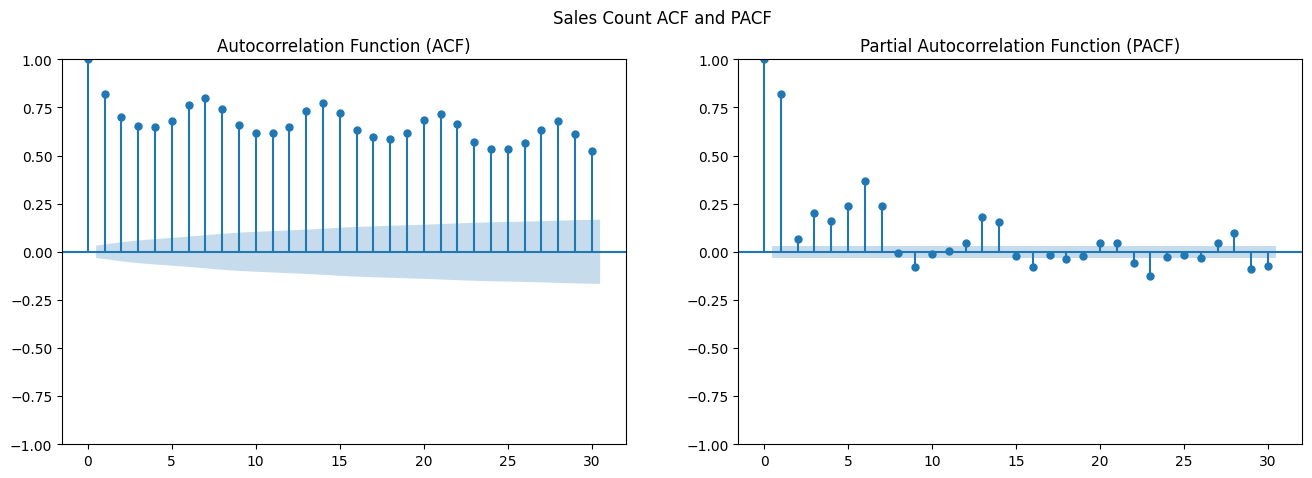

In [33]:
plot_acf_pacf(sales_ts, lags=30, title='Sales Count ACF and PACF')

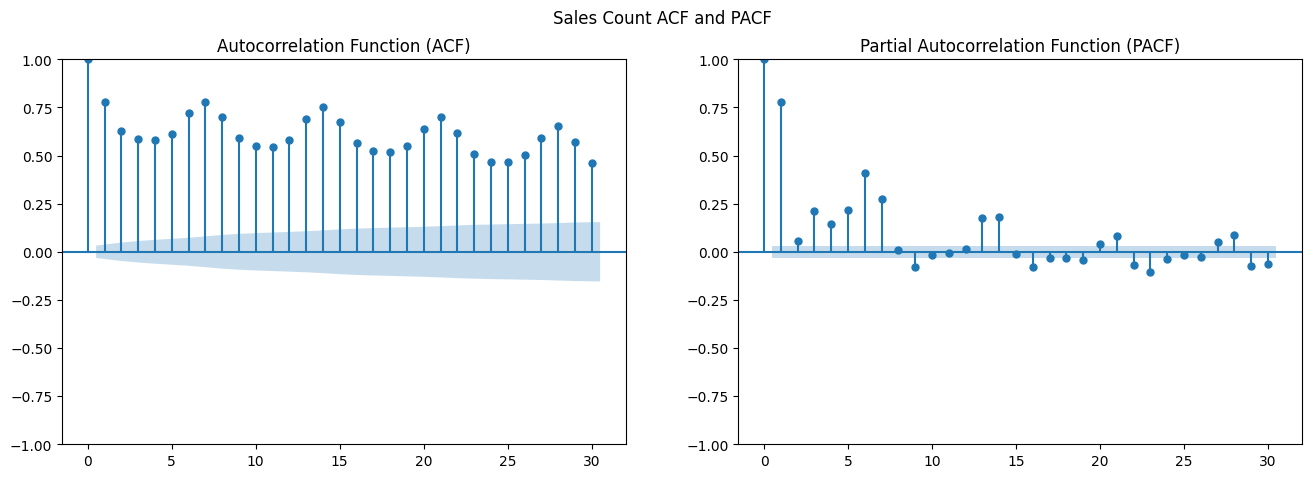

In [ ]:
plot_acf_pacf(redemption_ts, lags=30, title='Redemptions Count ACF and PACF')

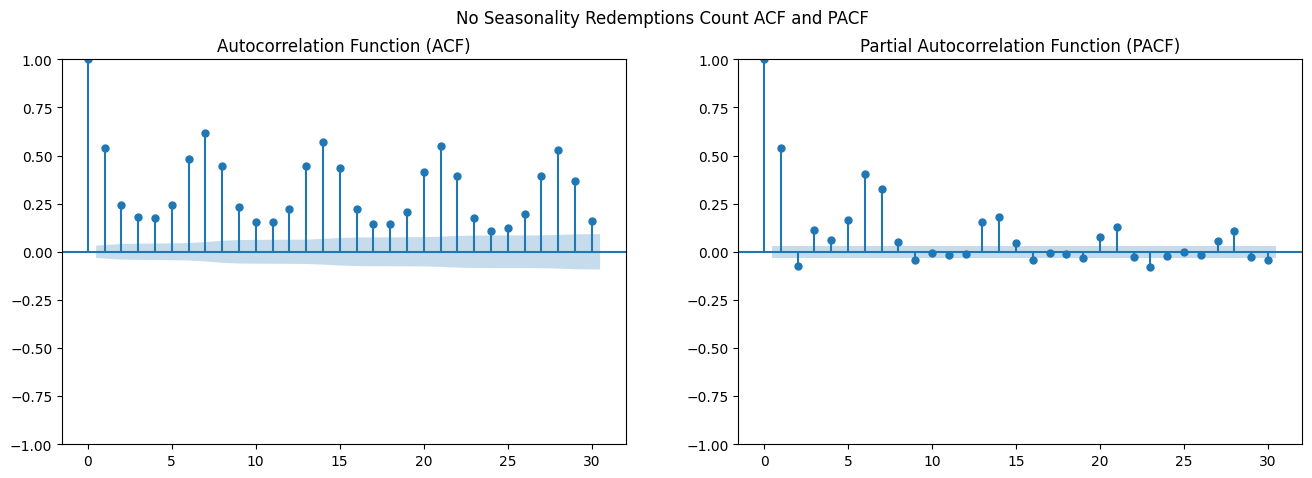

In [39]:
plot_acf_pacf(no_seasonality_redemptions, lags=30, title='No Seasonality Redemptions Count ACF and PACF')

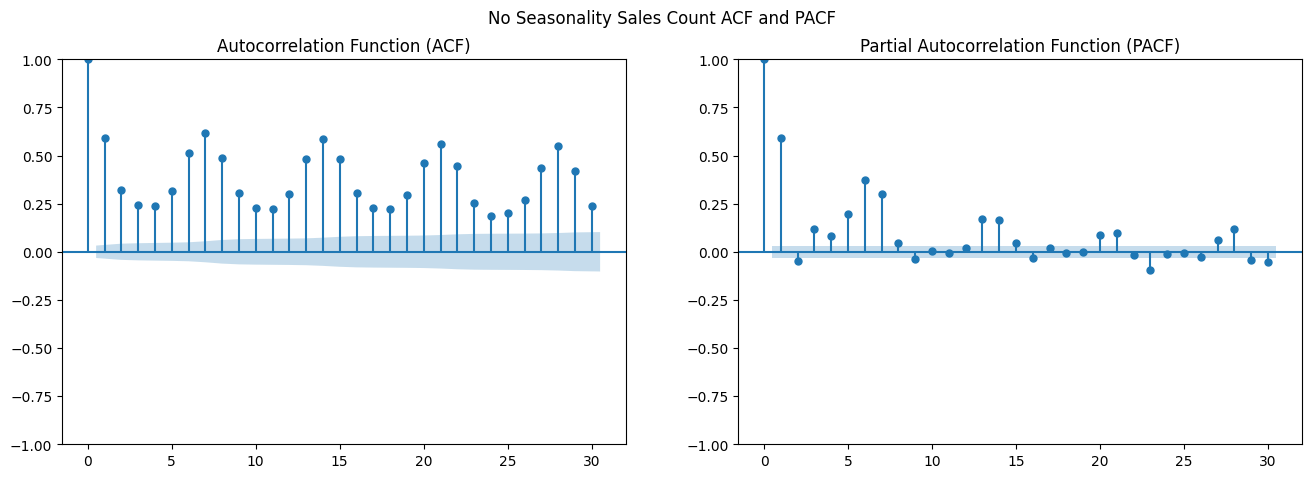

In [40]:
plot_acf_pacf(no_seasonality_sales, lags=30, title='No Seasonality Sales Count ACF and PACF')